In [2]:
#First of all, let's import all required Python Libraries which are required for analysis
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime # To identify Datetime
import pandas_profiling 
from matplotlib import pyplot as plt
#%matplotlib inline  

In [3]:
#Read the source file (Raw data having Air Quality Sample values)
dt= pd.read_csv("./AirQualityUCI.csv")

In [4]:
#Glimpse of dataset by selecting top 5 rows 
dt.head(5)

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  3/10/2004  18:00:00     2.6         1360       150      11.9   
1  3/10/2004  19:00:00     2.0         1292       112       9.4   
2  3/10/2004  20:00:00     2.2         1402        88       9.0   
3  3/10/2004  21:00:00     2.2         1376        80       9.2   
4  3/10/2004  22:00:00     1.6         1272        51       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0           1046      166          1056      113          1692         1268   
1            955      103          1174       92          1559          972   
2            939      131          1140      114          1555         1074   
3            948      172          1092      122          1584         1203   
4            836      131          1205      116          1490         1110   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255  
2  11.9  54.0  0.7502  
3  11.0  60.0  0.7867  
4  11.2  59.6  0.7888

In [5]:
#Check shape of dataset , how many rows and columns are available 
dt.shape

(9357, 15)

In [6]:
#Assign a new dataframe for calculation just as a safe side
df=dt

In [7]:
#See top 5 rows to understand how data looks like 
df.head(5)

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  3/10/2004  18:00:00     2.6         1360       150      11.9   
1  3/10/2004  19:00:00     2.0         1292       112       9.4   
2  3/10/2004  20:00:00     2.2         1402        88       9.0   
3  3/10/2004  21:00:00     2.2         1376        80       9.2   
4  3/10/2004  22:00:00     1.6         1272        51       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0           1046      166          1056      113          1692         1268   
1            955      103          1174       92          1559          972   
2            939      131          1140      114          1555         1074   
3            948      172          1092      122          1584         1203   
4            836      131          1205      116          1490         1110   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255  
2  11.9  54.0  0.7502  
3  11.0  60.0  0.7867  
4  11.2  59.6  0.7888

## From above view we can see
1. Dataset is having 9357 rows with 15 columns 
2. Column names are not giving clear details so we need to give a meaningful name to the columns to avoid any confusion

## Before change Columns names are 

['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH']




## Description of Columns 
CO = Carbon Mono Oxide Gas <br>
PT08S1 = TinOxide <br>
NHMC= Non Metalic Hydrocarbon <br>
C6H6 = Benzene <br>
PT08S2 = Titania <br>
NOx= Nitrogen Oxide <br>
PT08S3 = Tungsten Oxide (nominally NOx targeted) <br>
NO2= Nitrogen Dioxide <br>
PT08S4 = Tungsten Oxide (nominally NO2 targeted) <br>
PT08S5 = Indium Oxide (nominally O3 targeted)<br>
T = Temperature in Degree Celcius<br>
RH = Relative Humidity <br>
AH = Absolute Humidity <br>




## Rename columns for better readability 

CO = CMONO <br>
PT08S1 = TinOxide <br>
NHMC= NonMetalicHydrocarbon <br>
C6H6 = Benzene <br>
PT08S2 = Titania <br>
NOx= NitrogenOxide <br>
PT08S3 = TungstenOxide (nominally NOx targeted) <br>
NO2= NitrogenDioxide <br>
PT08S4 = TungstenOxide (nominally NO2 targeted) <br>
PT08S5 = IndiumOxide (nominally O3 targeted)<br>
T = Temperature in Degree Celcius<br>
RH = Relative Humidity <br>
AH = Absolute Humidity <br>

In [8]:
# Below section of code will rename the columns for better readability 

df = df.rename(columns={
                        'CO(GT)' : 'CarbonMonoxide',
                        'PT08.S1(CO)' : 'TinOxide', 
                        'NMHC(GT)' : 'NonMetalicHydrocarbon', 
                        'C6H6(GT)' : 'Benzene',  
                        'PT08.S2(NMHC)' : 'Titania', 
                        'NOx(GT)' : 'NitrogenOxide', 
                        'PT08.S3(NOx)' : 'TungstenOxideNOx', 
                        'NO2(GT)' : 'NitrogenDioxide', 
                        'PT08.S4(NO2)' : 'TungstenOxideNO2', 
                        'PT08.S5(O3)' : 'IndiumOxide', 
                        'T' : 'Temperature', 
                        'RH' : 'RelativeHumidity', 
                        'AH' : 'AbsoluteHumidity'    
                       })

In [9]:
#Check the column names after change
df.columns

Index(['Date', 'Time', 'CarbonMonoxide', 'TinOxide', 'NonMetalicHydrocarbon',
       'Benzene', 'Titania', 'NitrogenOxide', 'TungstenOxideNOx',
       'NitrogenDioxide', 'TungstenOxideNO2', 'IndiumOxide', 'Temperature',
       'RelativeHumidity', 'AbsoluteHumidity'],
      dtype='object')

In [10]:
#See top 5 rows to understand how data looks like after changing column names
df.head(5)

Date      Time  CarbonMonoxide  TinOxide  NonMetalicHydrocarbon  \
0  3/10/2004  18:00:00             2.6      1360                    150   
1  3/10/2004  19:00:00             2.0      1292                    112   
2  3/10/2004  20:00:00             2.2      1402                     88   
3  3/10/2004  21:00:00             2.2      1376                     80   
4  3/10/2004  22:00:00             1.6      1272                     51   

   Benzene  Titania  NitrogenOxide  TungstenOxideNOx  NitrogenDioxide  \
0     11.9     1046            166              1056              113   
1      9.4      955            103              1174               92   
2      9.0      939            131              1140              114   
3      9.2      948            172              1092              122   
4      6.5      836            131              1205              116   

   TungstenOxideNO2  IndiumOxide  Temperature  RelativeHumidity  \
0              1692         1268         13.6              48.9   
1              1559          972         13.3              47.7   
2              1555         1074         11.9              54.0   
3              1584         1203         11.0              60.0   
4              1490         1110         11.2              59.6   

   AbsoluteHumidity  
0            0.7578  
1            0.7255  
2            0.7502  
3            0.7867  
4            0.7888

In [11]:
#Temporarily i wish to save it in a CSV file 
df.to_csv("./AirQualityRawData.csv")

In [12]:
# Pandas profilling will give a high level overview of the dataset
# Pandas Profilling is used to Profile Dataset to see its details
# Report of type pandas_profiling.ProfileReport is created
report = pandas_profiling.ProfileReport(df)

# Create name of the report to be saved in working directory so that name of the report should be created
## on runtime with execution date time

timenow = datetime.now().strftime('%d%b%Y%H%M%S')
filename = 'AirQuality' + timenow +'.html'

#Save report as filename to present working directory
report.to_file(filename)

In [13]:
# The first step will be to check if dataset is having any null values as null values affect the analysis
# Below query checks there are any null values in datadrame df and sums them up
df.isnull().sum() 
# output is zero means no missing values 

Date                     0
Time                     0
CarbonMonoxide           0
TinOxide                 0
NonMetalicHydrocarbon    0
Benzene                  0
Titania                  0
NitrogenOxide            0
TungstenOxideNOx         0
NitrogenDioxide          0
TungstenOxideNO2         0
IndiumOxide              0
Temperature              0
RelativeHumidity         0
AbsoluteHumidity         0
dtype: int64

In [14]:
# No null values present in the dataframe
# However from the dataset document descripion, we got to know that missing values were already replaced by -200 
# which means -200 were null values earlier and we need to identify them , replace with null 
# and remove null values to remove dirty data
df[df == -200].count()

Date                        0
Time                        0
CarbonMonoxide           1683
TinOxide                  366
NonMetalicHydrocarbon    8443
Benzene                   366
Titania                   366
NitrogenOxide            1639
TungstenOxideNOx          366
NitrogenDioxide          1642
TungstenOxideNO2          366
IndiumOxide               366
Temperature               366
RelativeHumidity          366
AbsoluteHumidity          366
dtype: int64

In [15]:
# above results clearly show that we were having so many dirty (-200) values which we will replace by null values 
# To see how many null/blank values we were having and will remove them eventually 

df[df == -200]=np.NAN

In [16]:
# See how many null (blank) values are available 
df.isnull().sum()

Date                        0
Time                        0
CarbonMonoxide           1683
TinOxide                  366
NonMetalicHydrocarbon    8443
Benzene                   366
Titania                   366
NitrogenOxide            1639
TungstenOxideNOx          366
NitrogenDioxide          1642
TungstenOxideNO2          366
IndiumOxide               366
Temperature               366
RelativeHumidity          366
AbsoluteHumidity          366
dtype: int64

In [17]:
# Considering we dont have any business logic to fill null/dirty values we will drop them as of now 
df=df.dropna()

In [18]:
# Let's see how much good data we have 
df.shape

(827, 15)

In [19]:
# So we have 827 rows recieved after dropping rows having null values, 
# 15 columns of good data for further analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 827 entries, 0 to 1230
Data columns (total 15 columns):
Date                     827 non-null object
Time                     827 non-null object
CarbonMonoxide           827 non-null float64
TinOxide                 827 non-null float64
NonMetalicHydrocarbon    827 non-null float64
Benzene                  827 non-null float64
Titania                  827 non-null float64
NitrogenOxide            827 non-null float64
TungstenOxideNOx         827 non-null float64
NitrogenDioxide          827 non-null float64
TungstenOxideNO2         827 non-null float64
IndiumOxide              827 non-null float64
Temperature              827 non-null float64
RelativeHumidity         827 non-null float64
AbsoluteHumidity         827 non-null float64
dtypes: float64(13), object(2)
memory usage: 103.4+ KB


In [20]:
df.describe()

CarbonMonoxide     TinOxide  NonMetalicHydrocarbon     Benzene  \
count      827.000000   827.000000             827.000000  827.000000   
mean         2.353567  1207.879081             231.025393   10.771100   
std          1.409496   241.816997             208.461912    7.418134   
min          0.300000   753.000000               7.000000    0.500000   
25%          1.300000  1017.000000              77.000000    4.800000   
50%          2.000000  1172.000000             157.000000    9.100000   
75%          3.100000  1380.000000             318.500000   14.800000   
max          8.100000  2040.000000            1189.000000   39.200000   

           Titania  NitrogenOxide  TungstenOxideNOx  NitrogenDioxide  \
count   827.000000     827.000000        827.000000       827.000000   
mean    966.116082     143.501814        963.297461       100.259976   
std     266.424557      81.829717        265.914168        31.493823   
min     448.000000      12.000000        461.000000        19.000000   
25%     754.000000      81.000000        769.000000        78.500000   
50%     944.000000     128.000000        920.000000        99.000000   
75%    1142.500000     187.000000       1131.000000       122.000000   
max    1754.000000     478.000000       1935.000000       196.000000   

       TungstenOxideNO2  IndiumOxide  Temperature  RelativeHumidity  \
count        827.000000   827.000000   827.000000        827.000000   
mean        1600.620314  1045.812576    15.601451         49.050181   
std          302.291793   400.134662     4.825304         15.266746   
min          955.000000   263.000000     6.300000         14.900000   
25%         1369.500000   760.000000    11.900000         36.700000   
50%         1556.000000  1009.000000    15.000000         49.600000   
75%         1783.500000  1320.000000    18.300000         60.550000   
max         2679.000000  2359.000000    30.000000         83.200000   

       AbsoluteHumidity  
count        827.000000  
mean           0.831853  
std            0.178506  
min            0.402300  
25%            0.718950  
50%            0.817700  
75%            0.927500  
max            1.485200

## Let's profile the dataset again to see how various columns , realationships look like at a high level

In [21]:

# Pandas Profilling is used to Profile Dataset to see its details
# Report of type pandas_profiling.ProfileReport is created
report = pandas_profiling.ProfileReport(df)

# Create name of the report to be saved in working directory so that name of the report should be created
## on runtime with execution date time

timenow = datetime.now().strftime('%d%b%Y%H%M%S')
filename = 'AirQuality' + timenow +'.html'

#Save report as filename to present working directory
report.to_file(filename)

In [22]:
df.columns

Index(['Date', 'Time', 'CarbonMonoxide', 'TinOxide', 'NonMetalicHydrocarbon',
       'Benzene', 'Titania', 'NitrogenOxide', 'TungstenOxideNOx',
       'NitrogenDioxide', 'TungstenOxideNO2', 'IndiumOxide', 'Temperature',
       'RelativeHumidity', 'AbsoluteHumidity'],
      dtype='object')

## Time to visualise  the dataset and its features

1. From a high level view of the dataset, we can clearly identify the relationship between Temperature , RelativeHumidity , so lets plot couple of visualisations

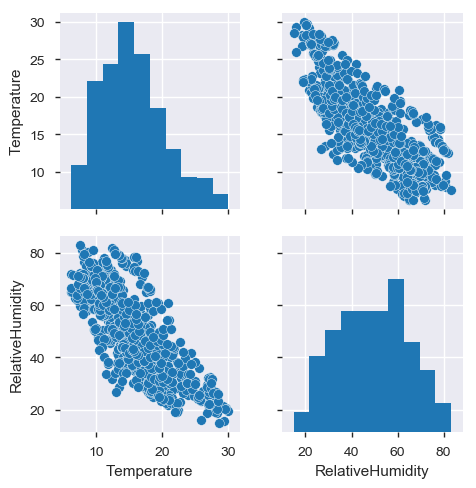

In [23]:
# By looking at data , lets plot visualisation to understand relationship , temperature and RelativeHumidity seems to be related
# lets see how related they are in actual
g = sns.pairplot(df[["Temperature",                                  
                                 "RelativeHumidity"]], 
                 
                 diag_kind="hist")

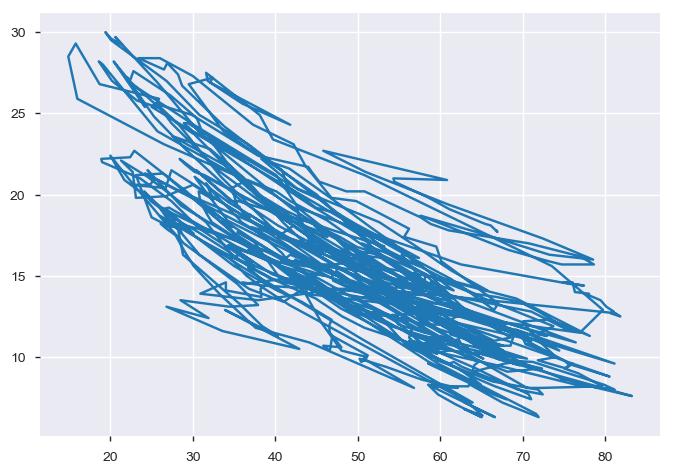

In [24]:
# Above graph shows Temperature and Relativehumidity are negatively correlated
# Plot another visualisation to see its spread
xA= df["RelativeHumidity"]
yA=df["Temperature"]
plt.plot(xA, yA)

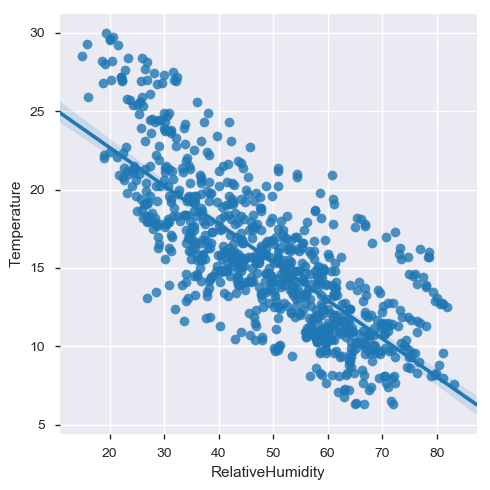

In [25]:
# Lets see line plot as well for two features 
g = sns.lmplot(x="RelativeHumidity", y="Temperature", data=df)

C:\Python\Python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of Temperature')

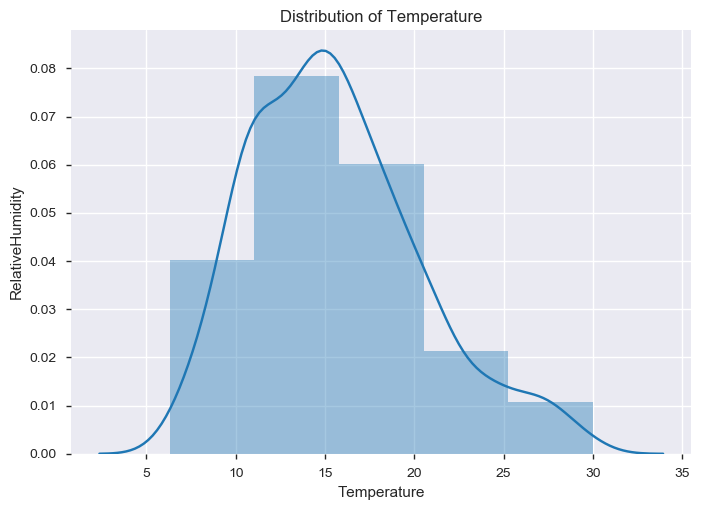

In [26]:
# Lets see temperature distribution of data
sns.distplot(df['Temperature'], bins=5, kde=True)
plt.ylabel('RelativeHumidity')
plt.title('Distribution of Temperature')

## Distribution of Temperature
Above visualisation shows us a distribution of temperature in the given dataset and how RelativeHumidity varies acording to a change with Temperature

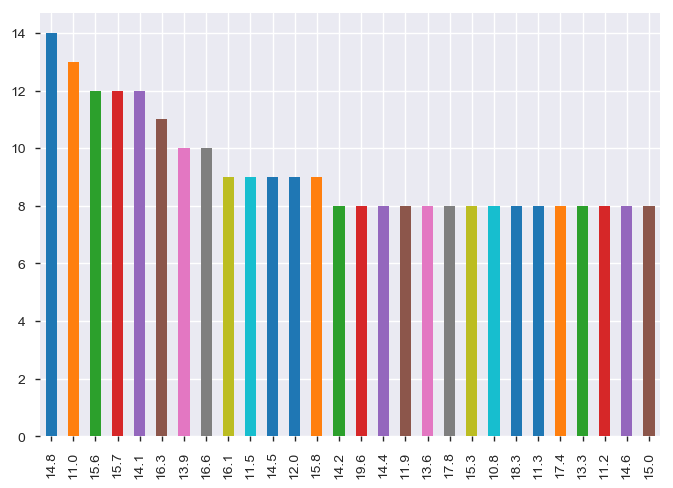

In [27]:
# Lets see temperature distribution of data
df['Temperature'].value_counts()[:15].plot(kind='bar')

## Let's see features correlation by using heatmap - one of the best visualisation used for identifying correlation

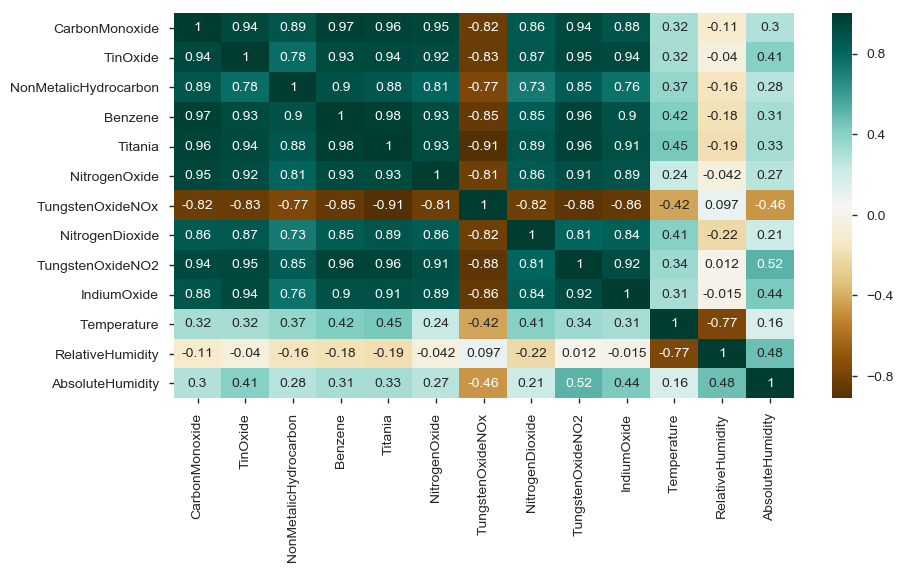

In [28]:
# Time to visualise correlation by heatmap and understand the feature importance
plt.subplots(figsize=(10,5))
sns.heatmap(df.corr(),cmap="BrBG",annot=True)

In [29]:
#g = sns.lmplot(x="RelativeHumidity", y="Temperature", data=df)
df.columns

Index(['Date', 'Time', 'CarbonMonoxide', 'TinOxide', 'NonMetalicHydrocarbon',
       'Benzene', 'Titania', 'NitrogenOxide', 'TungstenOxideNOx',
       'NitrogenDioxide', 'TungstenOxideNO2', 'IndiumOxide', 'Temperature',
       'RelativeHumidity', 'AbsoluteHumidity'],
      dtype='object')

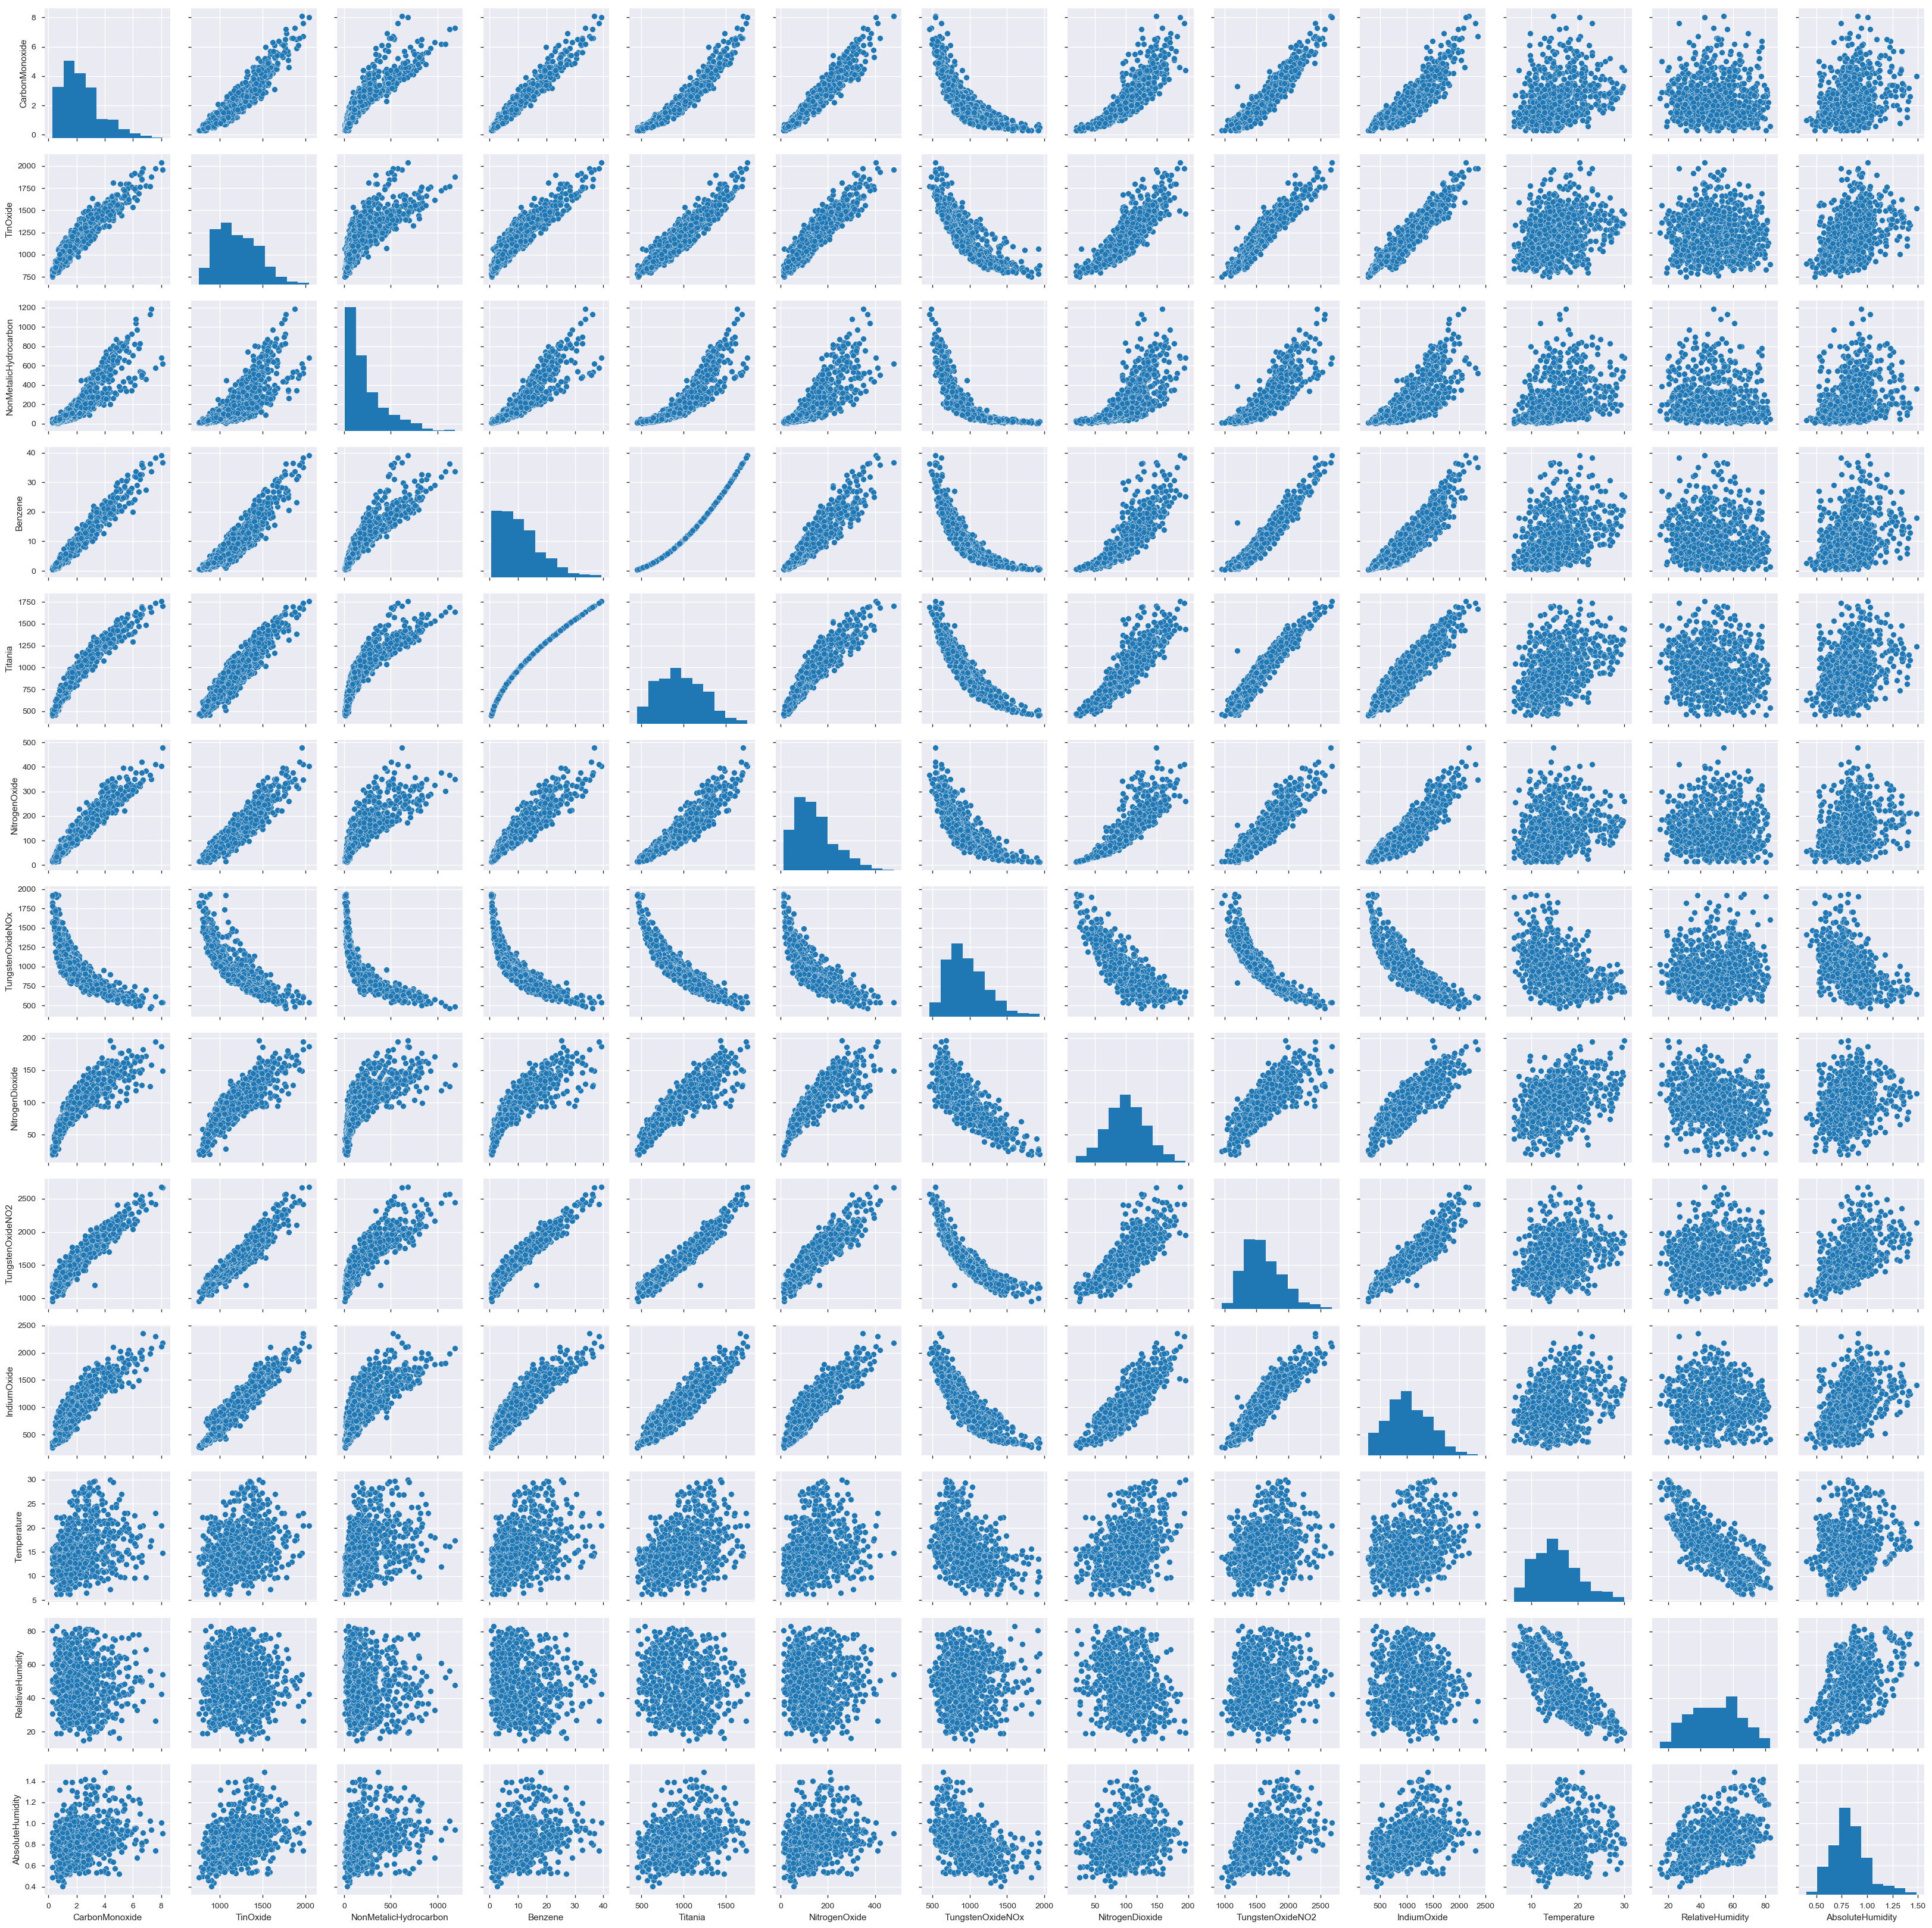

In [30]:
# Pair- plot - a plot used to see visualisation , spread of all data variables
g = sns.pairplot(df)

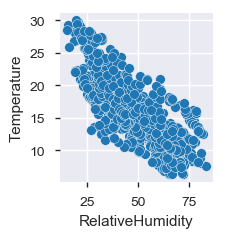

In [31]:
g = sns.pairplot(df,
                 x_vars=["RelativeHumidity"],
                  y_vars=["Temperature"])

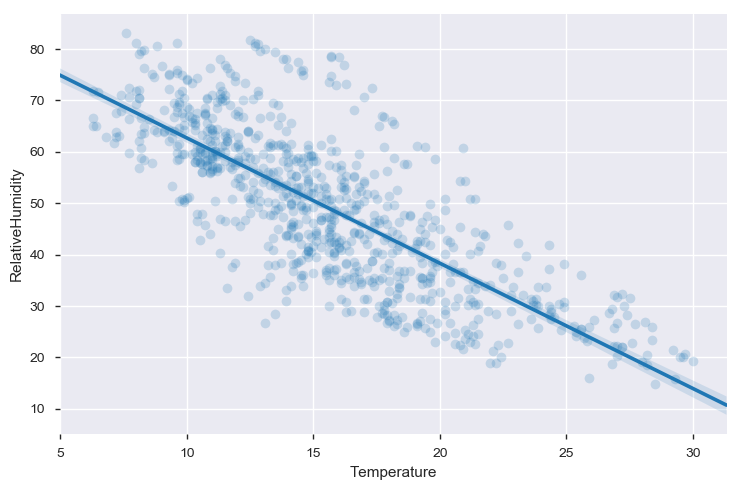

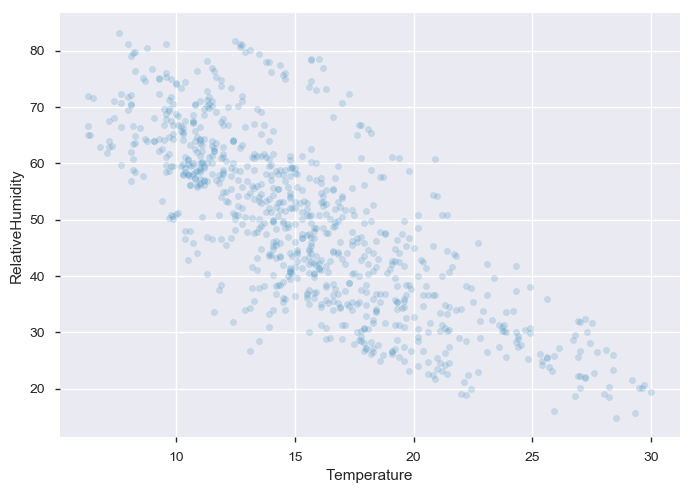

In [32]:
#Explore the relationship between Sepal Length and other independent variables
#sns.lmplot(x='RelativeHumidity', y='Temperature', data=df, aspect=1.5, scatter_kws={'alpha':0.2})
sns.lmplot(x='Temperature', y='RelativeHumidity', data=df, aspect=1.5, scatter_kws={'alpha':0.2})
df.plot(kind='scatter', x='Temperature', y='RelativeHumidity', alpha=0.2)

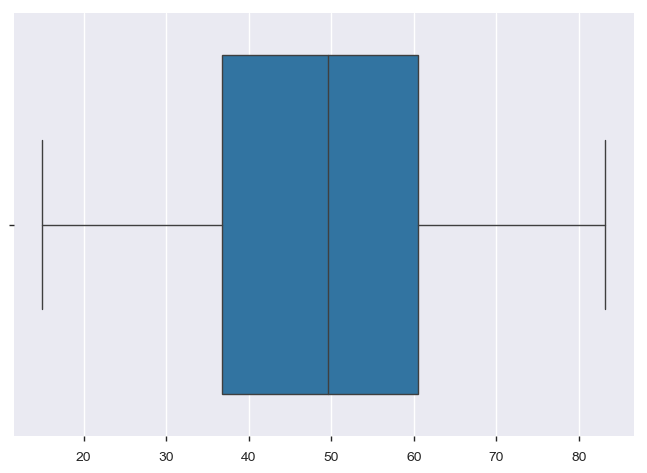

In [33]:
# see spread of RelativeHumidity
sns.boxplot(df[['RelativeHumidity']],data=df,linewidth=1)
plt.show()

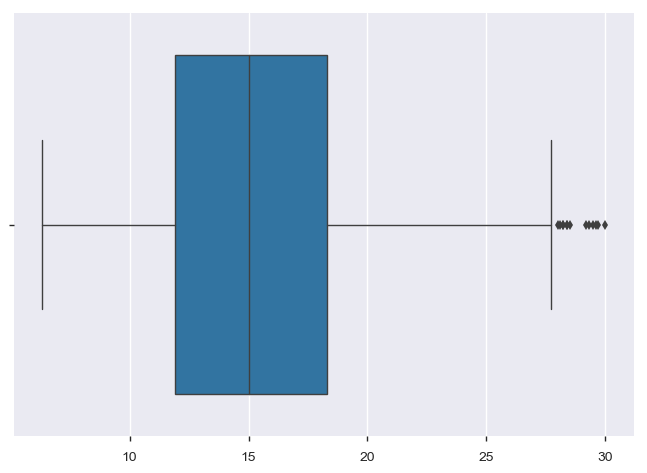

In [34]:
# see spread of Temperature
sns.boxplot(df[['Temperature']],data=df,linewidth=1)
plt.show()

## Time to build Machine learning Model
From the above analysis we can see data is linearly spread and it will ask for Linear Regression 
Let's build a linear regression model

In [35]:
# Below is the 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# define a function that accepts a list of features and returns score
def train_test_score(feature_cols):
    X = df[feature_cols]
    y = df.RelativeHumidity
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return linreg.score(X_test,y_test)

In [36]:
df.columns

Index(['Date', 'Time', 'CarbonMonoxide', 'TinOxide', 'NonMetalicHydrocarbon',
       'Benzene', 'Titania', 'NitrogenOxide', 'TungstenOxideNOx',
       'NitrogenDioxide', 'TungstenOxideNO2', 'IndiumOxide', 'Temperature',
       'RelativeHumidity', 'AbsoluteHumidity'],
      dtype='object')

In [37]:
# compare different sets of features
print( "Score 1 with Temperature", train_test_score(['Temperature']) )
print( "Score 2 with Temperature and Absolute Humidity", train_test_score(['Temperature', 'AbsoluteHumidity']))
print("Score 3 with Temperature,NitrogenDioxide",train_test_score(['Temperature', 'NitrogenDioxide']))
print("Score 4",train_test_score(['Temperature', 'Titania']))
print("Score 5",train_test_score(['Temperature', 'Titania' , 'NitrogenDioxide']))
print("Score 6",train_test_score(['Temperature', 'TungstenOxideNOx']))
print("Score 7 with Temperature and TungstenOxideNO2 ",train_test_score(['Temperature', 'TungstenOxideNO2']))
print("Score 8 with Temperature, IndiumOxide adn TungstenOxideNO2",train_test_score(['Temperature', 'IndiumOxide' ,'TungstenOxideNO2']))
print("Score 9 with TungstenOxideNO2 and TungstenOxideNOx",train_test_score(['Temperature', 'TungstenOxideNO2','TungstenOxideNOx']))

Score 1 with Temperature 0.6255844678731912
Score 2 with Temperature and Absolute Humidity 0.9654047530955219
Score 3 with Temperature,NitrogenDioxide 0.639250375788329
Score 4 0.6522583870993535
Score 5 0.652172342061469
Score 6 0.6616841731792642
Score 7 with Temperature and TungstenOxideNO2  0.7018035474440021
Score 8 with Temperature, IndiumOxide adn TungstenOxideNO2 0.7098608728541012
Score 9 with TungstenOxideNO2 and TungstenOxideNOx 0.6988703288390706


So from various features combination we used various accuracy levels ,out of which score 7, 8 seems optimal <br>

<br>
<br>
<br>
<br>
Now let's calculate RMSE ( Root Mean Squared Error) to check error values

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics


In [39]:
# define a function that accepts a list of features and returns testing RMSE
def train_test_RMSE(feature_cols):
    X = df[feature_cols]
    y = df.RelativeHumidity
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    #return linreg.score(X_test,y_test)

In [40]:
print( "RMSE with Temperature", train_test_RMSE(['Temperature']) )
print( "RMSE with Temperature and Absolute Humidity", train_test_RMSE(['Temperature', 'AbsoluteHumidity']))
print("RMSE with Temperature,NitrogenDioxide",train_test_RMSE(['Temperature', 'NitrogenDioxide']))
print("RMSE with Temperature and Titania ",train_test_RMSE(['Temperature', 'Titania']))
print("RMSE with Temperature,Titania and NitrogenDioxide",train_test_RMSE(['Temperature', 'Titania' , 'NitrogenDioxide']))
print("RMSE with Temperature and TungstenOxideNOx",train_test_RMSE(['Temperature', 'TungstenOxideNOx']))
print("RMSE with Temperature and TungstenOxideNO2",train_test_RMSE(['Temperature', 'TungstenOxideNO2']))
print("RMSE with Temperature, IndiumOxide and TungstenOxideNO2",train_test_RMSE(['Temperature', 'IndiumOxide' ,'TungstenOxideNO2']))
print("RMSE with Temperature, TungstenOxideNO2 and TungstenOxideNOx",train_test_RMSE(['Temperature', 'TungstenOxideNO2','TungstenOxideNOx']))

RMSE with Temperature 9.364920445929144
RMSE with Temperature and Absolute Humidity 2.846658574455493
RMSE with Temperature,NitrogenDioxide 9.192425267662927
RMSE with Temperature and Titania  9.025172184321937
RMSE with Temperature,Titania and NitrogenDioxide 9.026288707655686
RMSE with Temperature and TungstenOxideNOx 8.902014999138776
RMSE with Temperature and TungstenOxideNO2 8.35753878049173
RMSE with Temperature, IndiumOxide and TungstenOxideNO2 8.243854427078512
RMSE with Temperature, TungstenOxideNO2 and TungstenOxideNOx 8.398542786973092


## So based on above we can see model with Temperature, TungstenOxideNO2 and TungstenOxideNOx features is best 
